In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

In this section, we'll explore summary statistics for the global energy consumption dataset. We'll start by loading the data and reviewing its structure to understand what columns and values are available for analysis.

In [245]:
df = pd.read_csv('../data/global_energy_consumption.csv')
df.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [246]:
print(df.columns.tolist())

['Country', 'Year', 'Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']


In [247]:
summary = df.describe(include='all')
print(summary)

       Country          Year  Total Energy Consumption (TWh)  \
count    10000  10000.000000                    10000.000000   
unique      10           NaN                             NaN   
top        USA           NaN                             NaN   
freq      1053           NaN                             NaN   
mean       NaN   2012.151400                     5142.564425   
std        NaN      7.155236                     2848.754040   
min        NaN   2000.000000                      100.480000   
25%        NaN   2006.000000                     2713.882500   
50%        NaN   2012.000000                     5190.850000   
75%        NaN   2018.000000                     7579.977500   
max        NaN   2024.000000                     9999.260000   

        Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
count                  10000.000000                10000.000000   
unique                          NaN                         NaN   
top                           

Checking for missing(null) data

In [248]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64


No null Data, we can move on to data types and consistancy,

In [249]:
print(df.dtypes)

Country                             object
Year                                 int64
Total Energy Consumption (TWh)     float64
Per Capita Energy Use (kWh)        float64
Renewable Energy Share (%)         float64
Fossil Fuel Dependency (%)         float64
Industrial Energy Use (%)          float64
Household Energy Use (%)           float64
Carbon Emissions (Million Tons)    float64
Energy Price Index (USD/kWh)       float64
dtype: object


Data types are correct. We can move on to Normalization.

In normalization I will use Min/Max for Visualization, and later will opt to StandardScaler For the next Regression and Clustering.

In [250]:
scaler = preprocessing.MinMaxScaler()

# Select the colomns to normalize
num_cols = [
    'Total Energy Consumption (TWh)',
    'Per Capita Energy Use (kWh)',
    'Carbon Emissions (Million Tons)',
    'Energy Price Index (USD/kWh)'
]

df_minmax = df.copy()
df_minmax[num_cols] = scaler.fit_transform(df[num_cols])

# checked the values if they are normalized between 0 and 1 correctly using describe 
#print(df_minmax[num_cols].describe())
print("Head before Min-Max Normalization:")
display(df.head())
print("Head after Min-Max Normalization:")
display(df_minmax.head())


Head before Min-Max Normalization:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


Head after Min-Max Normalization:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,0.952127,0.844650,13.70,70.47,45.18,19.96,0.750797,0.155556
1,Germany,2020,0.790158,0.729473,33.63,41.95,34.32,22.27,0.538016,0.066667
2,Russia,2002,0.659630,0.831896,10.82,39.32,53.66,26.44,0.168800,0.466667
3,Brazil,2010,0.856642,0.211547,73.24,16.71,30.55,27.60,0.220961,0.933333
4,Canada,2006,0.075605,0.640352,73.60,74.86,42.39,23.43,0.159992,0.955556


Visualization

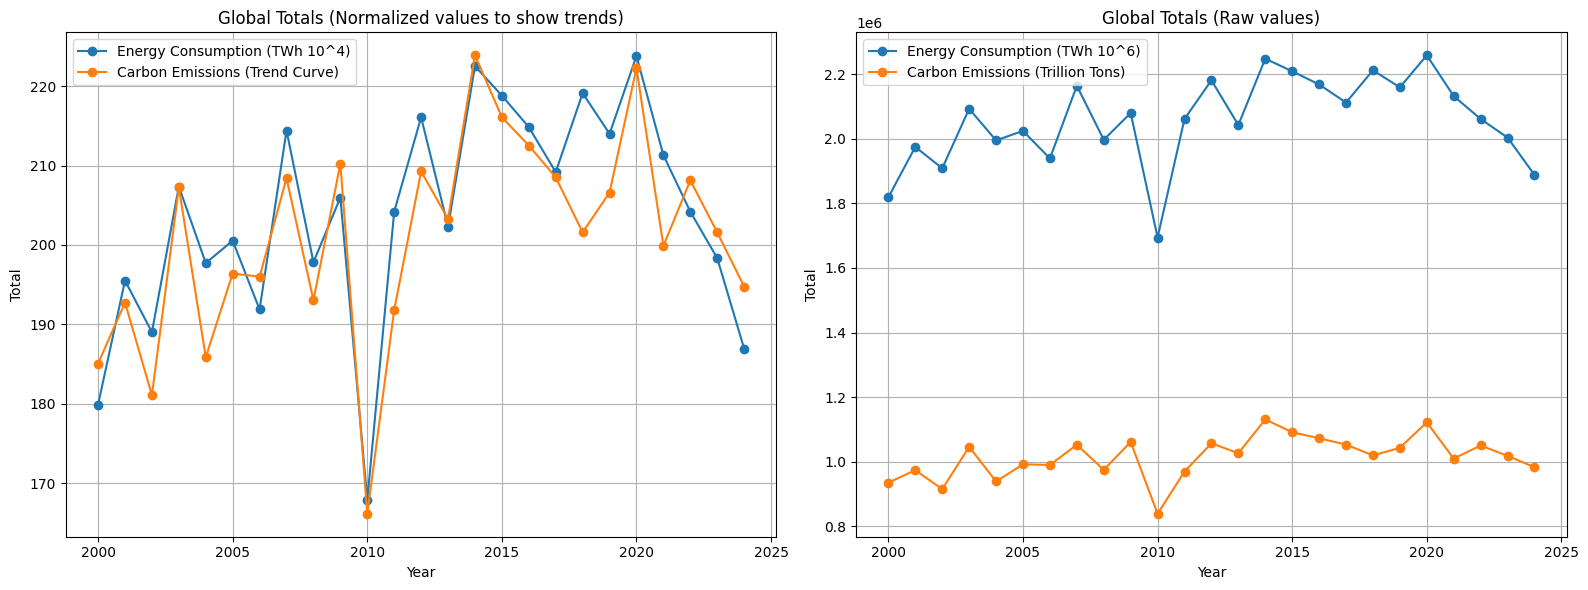

In [251]:
df_yearly = df_minmax.groupby('Year').agg({
    'Total Energy Consumption (TWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()

df_yearly_row = df.groupby('Year').agg({
    'Total Energy Consumption (TWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()

fig, axes = plt.subplots(1,2, figsize=(16, 6))
axes[0].plot(df_yearly['Year'], df_yearly['Total Energy Consumption (TWh)'], label='Energy Consumption (TWh 10^4)', marker='o')
axes[0].plot(df_yearly['Year'], df_yearly['Carbon Emissions (Million Tons)'], label='Carbon Emissions (Trend Curve)', marker='o')
axes[0].set_title('Global Totals (Normalized values to show trends)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df_yearly_row['Year'], df_yearly_row['Total Energy Consumption (TWh)'], label='Energy Consumption (TWh 10^6)', marker='o')
axes[1].plot(df_yearly_row['Year'], df_yearly_row['Carbon Emissions (Million Tons)'], label='Carbon Emissions (Trillion Tons)', marker='o')
axes[1].set_title('Global Totals (Raw values)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

I decided to present both the normalized and raw plots: the normalized plot highlights the trend and correlation between energy consumption and carbon emissions more clearly, while the raw plot shows the actual numerical values of both variables.

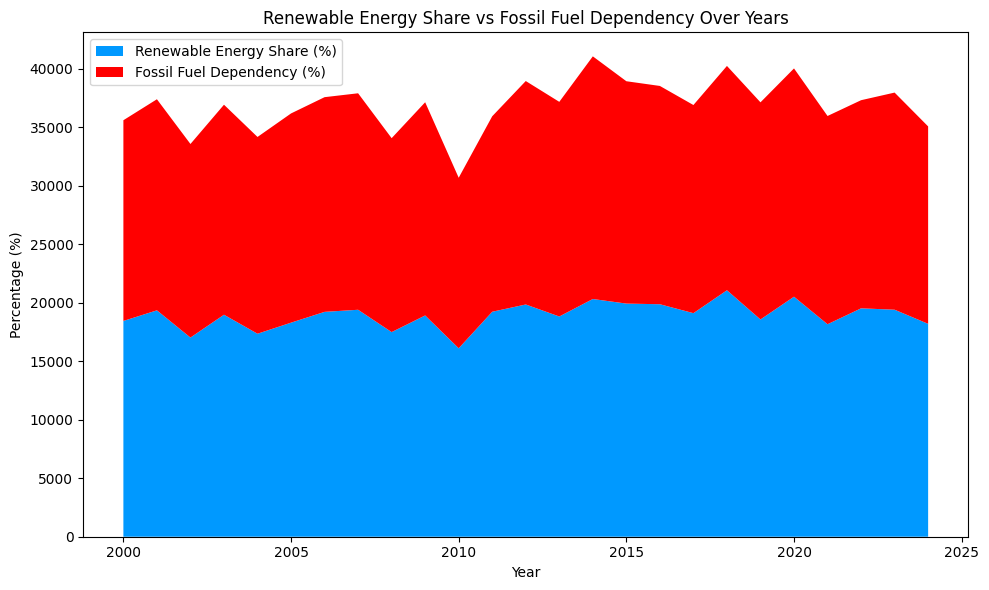

In [252]:
df_area = df.groupby('Year').agg({
    'Renewable Energy Share (%)': 'sum',
    'Fossil Fuel Dependency (%)': 'sum'
}).reset_index()


renewable = df_area['Renewable Energy Share (%)']
fossil = df_area['Fossil Fuel Dependency (%)']
years = df_area['Year']

plt.figure(figsize=(10, 6))
plt.stackplot(years, renewable, fossil, labels=['Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)'], colors=["#0099FF", "#FF0000"])
plt.title('Renewable Energy Share vs Fossil Fuel Dependency Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


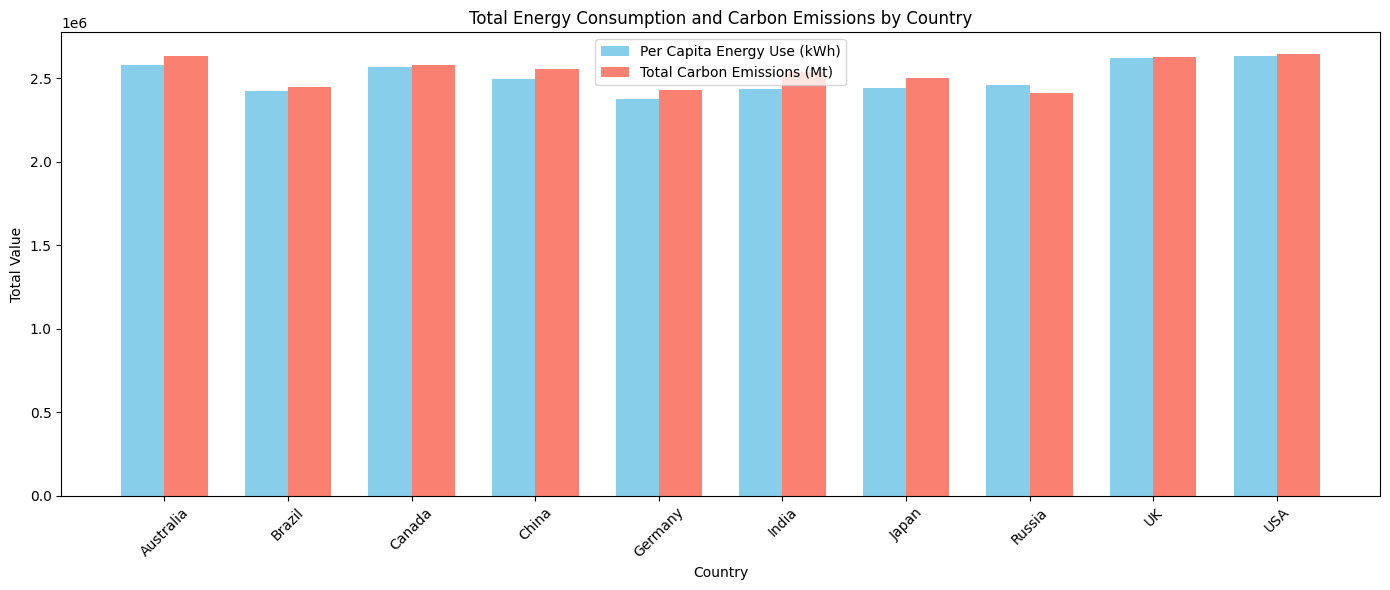

In [154]:
df_country_year = df.groupby(['Country']).agg({
    'Per Capita Energy Use (kWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()
countries = df_country_year['Country']

# Extract values for plotting
energy = df_country_year['Per Capita Energy Use (kWh)']
emissions = df_country_year['Carbon Emissions (Million Tons)']

x = np.arange(len(countries))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
bars2 = ax.bar(x - width/2, energy/10, width, label='Per Capita Energy Use (kWh)', color='skyblue')
bars1 = ax.bar(x + width/2, emissions, width, label='Total Carbon Emissions (Mt)', color='salmon')

# Labels/ticks
ax.set_xlabel('Country')
ax.set_ylabel('Total Value')
ax.set_title('Total Energy Consumption and Carbon Emissions by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


In [253]:
country_renewable_percent = df.groupby('Country')['Renewable Energy Share (%)'].mean().reset_index()

# Sort for top and bottom 5
top5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=False).head(5)
bottom5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=True).head(5)

# Display results
print("Top 5 Countries in Renewable Energy Adoption (%):")
print(top5)

print("\nBottom 5 Countries in Renewable Energy Adoption (%):")
print(bottom5)

Top 5 Countries in Renewable Energy Adoption (%):
     Country  Renewable Energy Share (%)
9        USA                   48.190133
7     Russia                   47.779669
5      India                   47.713303
2     Canada                   47.678525
0  Australia                   47.320705

Bottom 5 Countries in Renewable Energy Adoption (%):
   Country  Renewable Energy Share (%)
4  Germany                   46.352657
1   Brazil                   46.956944
3    China                   47.000457
8       UK                   47.044265
6    Japan                   47.118632


There is an issue that i realized while calculating the sum of total energy used for each country is that having for example the consumption of canada approximitly equal to the consumption of India is illogical, I have tried to review that entries try to find a pattern that is leading to this issue(multiple entry of each country per year).

I couldn't decide on weather i should use mean/median for the entries for the same year for each country or use the maximum consumption of each country per year( it won't work as there are multiple entries which are approximitly equal).

To make sure that I wasn't misinterpriting the values, I have compared the total consumption of each country in 2023 and total consumption of Energy of each country to multiple sources including Canada Energy Regulator, USA Energy Information Adminstration(https://www.eia.gov/), Our World in Data and Carbon Brief.

In [254]:
df_2023 = df[df['Year'] == 2023]
df_2023_country = df_2023.groupby('Country')['Total Energy Consumption (TWh)'].sum().reset_index()

print(df_2023_country)
print("the total consumption of energy for each country isn't correct")

     Country  Total Energy Consumption (TWh)
0  Australia                       178564.47
1     Brazil                       151484.02
2     Canada                       232026.26
3      China                       213014.29
4    Germany                       167784.93
5      India                       198070.65
6      Japan                       201362.60
7     Russia                       246051.71
8         UK                       192873.40
9        USA                       222555.04
the total consumption of energy for each country isn't correct


In [255]:
df_country_median = df_2023.groupby('Country')['Total Energy Consumption (TWh)'].median().reset_index()

print(df_country_median)
print("the total consumption of energy for each country isn't correct")

     Country  Total Energy Consumption (TWh)
0  Australia                        5181.285
1     Brazil                        5562.720
2     Canada                        5119.670
3      China                        4911.220
4    Germany                        4374.045
5      India                        5261.810
6      Japan                        3861.805
7     Russia                        4760.095
8         UK                        4778.590
9        USA                        5580.770
the total consumption of energy for each country isn't correct


In [242]:
df_total = df_2023.groupby('Country')['Total Energy Consumption (TWh)'].sum().reset_index()

print(df_total)
print("the total consumption of energy for each country isn't correct")

     Country  Total Energy Consumption (TWh)
0  Australia                       178564.47
1     Brazil                       151484.02
2     Canada                       232026.26
3      China                       213014.29
4    Germany                       167784.93
5      India                       198070.65
6      Japan                       201362.60
7     Russia                       246051.71
8         UK                       192873.40
9        USA                       222555.04
the total consumption of energy for each country isn't correct


I have researched way to fix the data and tried to use aggregate hybrid method and it still didn't get near the values of consumption seen in other data sets.

When a dataset has multiple entries for the same country and year, some rows may be:
Duplicates or repeated estimates — essentially the same value repeated multiple times.
Subcomponents or partial entries — different pieces of the total energy consumption that should be summed.
A simple sum or median alone can give wrong results:
Sum → overcounts duplicates.
Median → undercounts subcomponents.

I will move on to part 3 and will use Standard Scaler.

In [305]:

def clean_energy_data(df, value_col='Total Energy Consumption (TWh)', min_max_dict=None, global_min=1000, global_max=30000):
    cleaned = []
    for (country, year), group in df.groupby(['Country', 'Year']):
        min_val, max_val = min_max_dict.get(country, (global_min, global_max)) if min_max_dict else (global_min, global_max)
        filtered = group[(group[value_col] > min_val) & (group[value_col] < max_val)]
        median_val = filtered[value_col].median()
        cleaned.append({'Country': country, 'Year': year, value_col: median_val})
    return pd.DataFrame(cleaned)

# Now you can call without error:
df_cleaned = clean_energy_data(df)
display(df_cleaned[df_cleaned['Year'] == 2024])

,Country,Year,Total Energy Consumption (TWh)
24,Australia,2024,5694.010
49,Brazil,2024,6311.710
74,Canada,2024,5030.100
99,China,2024,4993.275
124,Germany,2024,6010.910
149,India,2024,4524.690
174,Japan,2024,5967.510
199,Russia,2024,6823.360
224,UK,2024,6139.070
249,USA,2024,5010.700


In [307]:

print(df[df['Country'] == 'Australia'])

        Country  Year  Total Energy Consumption (TWh)  \
14    Australia  2004                         9249.95   
18    Australia  2009                         3115.34   
23    Australia  2008                         1576.44   
57    Australia  2024                         6246.65   
58    Australia  2013                         9695.50   
...         ...   ...                             ...   
9958  Australia  2022                         1017.10   
9962  Australia  2005                         1609.18   
9966  Australia  2015                         7055.51   
9982  Australia  2015                         7726.33   
9984  Australia  2017                         6734.71   

      Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
14                       46519.48                        6.80   
18                        1261.09                       13.91   
23                       26766.46                       29.52   
57                       28419.18                      